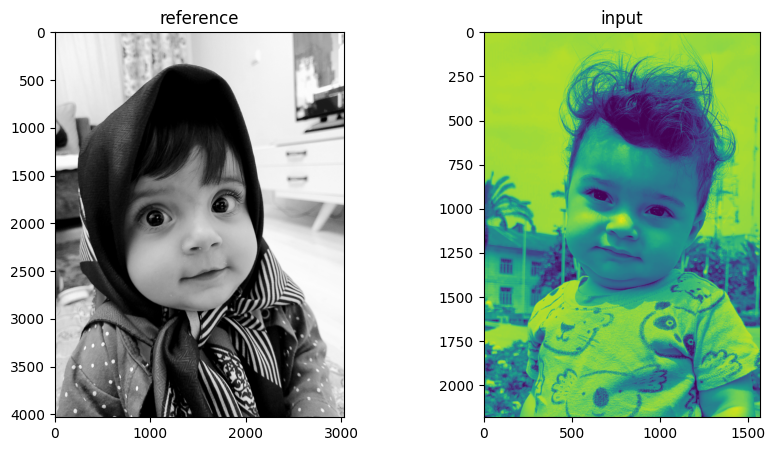

In [ ]:
import matplotlib.pyplot as plt

face_reference = plt.imread("face_reference.jpg")
face_input = plt.imread("face_input.jpg")

def togray(image):
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]
    return 0.299*R + 0.587*G + 0.114*B

refrence_gray = togray(face_reference)
input_gray = togray(face_input)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(refrence_gray, cmap="gray")
plt.title("reference")

plt.subplot(1, 2, 2)
plt.imshow(input_gray, cmap="gray")
plt.title("input")

plt.show()


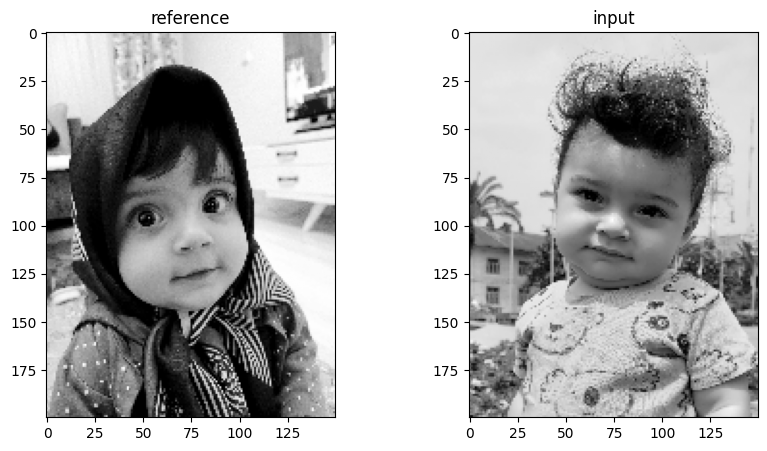

In [164]:
import numpy as np

def resize(image,high,width):
    y_points = np.linspace(0, len(image[:,0]) - 1, high).astype(np.int32)
    x_points = np.linspace(0, len(image[0,:]) - 1, width).astype(np.int32)
    return image[y_points][:, x_points]

refrence_resized = resize(refrence_gray,200,150)
input_resized = resize(input_gray,200,150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(refrence_resized, cmap="gray")
plt.title("reference")

plt.subplot(1, 2, 2)
plt.imshow(input_resized, cmap="gray")
plt.title("input")

plt.show()

In [ ]:
refrence_resized

array([[240.75 , 237.75 , 235.75 , ..., 251.   , 251.   , 251.   ],
       [237.75 , 240.75 , 236.75 , ..., 251.   , 243.901, 224.785],
       [235.049, 238.049, 241.75 , ..., 251.   , 161.164, 182.736],
       ...,
       [147.314, 162.16 , 144.951, ..., 177.915, 194.876, 121.622],
       [179.82 , 139.05 , 155.25 , ..., 196.039, 185.75 , 188.874],
       [181.575, 148.94 , 135.902, ..., 210.762, 199.799, 193.983]],
      shape=(200, 150))

In [ ]:
input_resized

array([[205.051, 205.051, 205.051, ..., 196.681, 195.969, 195.681],
       [205.051, 205.051, 205.051, ..., 195.681, 195.969, 195.681],
       [205.051, 205.051, 205.051, ..., 196.681, 196.969, 196.681],
       ...,
       [106.657, 106.945, 125.717, ..., 164.244, 163.874, 169.82 ],
       [129.918, 124.901, 119.352, ..., 171.646, 169.091, 164.863],
       [ 22.088,  12.789,  79.693, ..., 185.179, 180.82 , 173.646]],
      shape=(200, 150))

In [ ]:
MAE = np.mean(np.absolute(refrence_resized-input_resized))
MAE

np.float64(82.68136220000001)

In [ ]:
MSE = np.mean((refrence_resized-input_resized)**2)
MSE

np.float64(10349.095341042066)

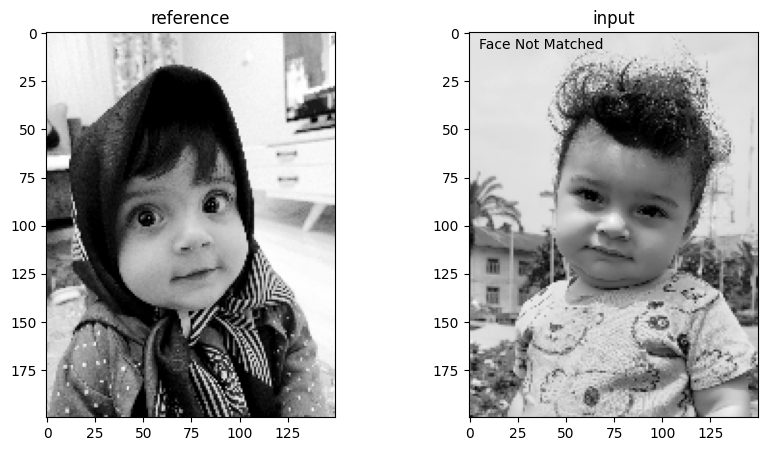

In [ ]:
match_text = "Face Not Matched"
if(MAE<10 or MSE<100):
    match_text = "Face Matched"

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(refrence_resized, cmap="gray")
plt.title("reference")

plt.subplot(1, 2, 2)
plt.imshow(input_resized, cmap="gray")
plt.title("input")
plt.text(5,8,match_text)

plt.show()

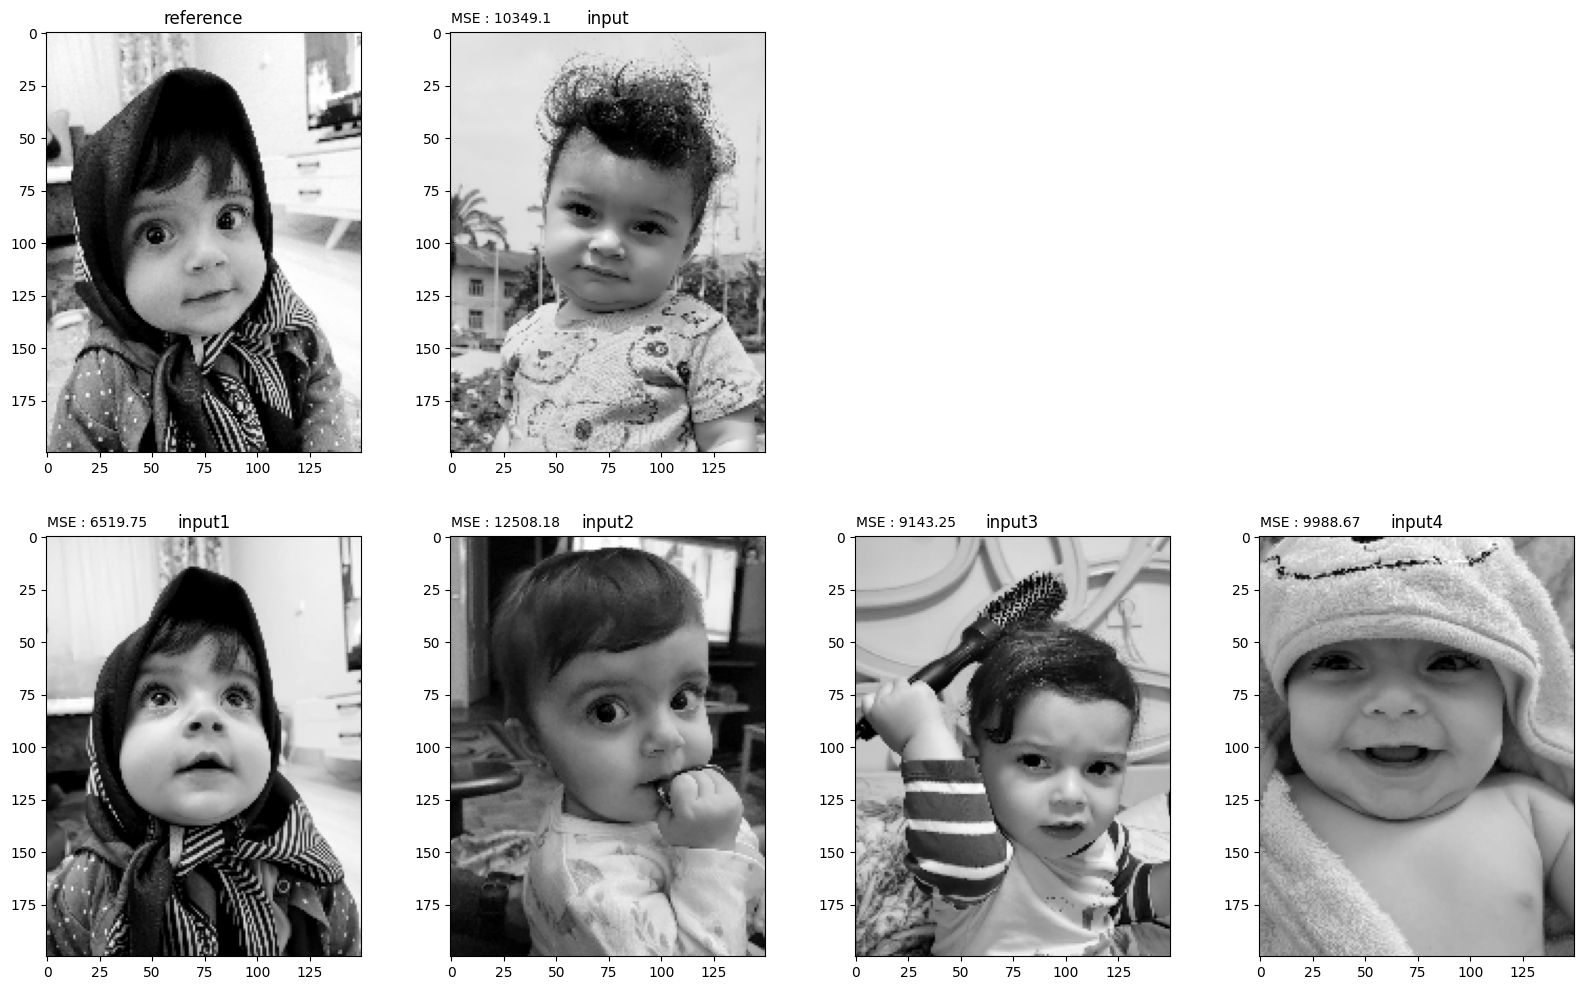

,MSE
input,10349.095341
input1,6519.752553
input2,12508.180745
input3,9143.250951
input4,9988.670205


In [ ]:
import pandas as pd

plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.imshow(refrence_resized, cmap="gray")
plt.title("reference")

plt.subplot(2, 4, 2)
plt.imshow(input_resized, cmap="gray")
plt.title("input")
plt.text(0,-5,f"MSE : {round(MSE,2)}")

MSE_df = pd.DataFrame(data={"MSE": [MSE]},index=["input"])
for i in range(4):
    fi = plt.imread(f"face_input{i+1}.jpg")
    ig = togray(fi)
    ir = resize(ig,200,150)
    mse = np.mean((refrence_resized-ir)**2)
    MSE_df.loc[f"input{i+1}"] = [mse]
    plt.subplot(2, 4, i+5)
    plt.imshow(ir, cmap="gray")
    plt.title(f"input{i+1}")
    plt.text(0,-5,f"MSE : {round(mse,2)}")
plt.show()
MSE_df

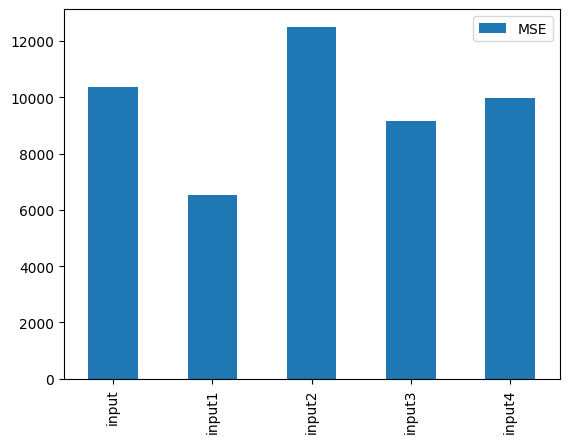

In [ ]:
MSE_df.plot(kind="bar")
plt.show()